In [1]:
#라이브러리 불러오기

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

pd.set_option("display.max_columns",None)

In [7]:
#데이터 불러오기 

df = pd.read_csv("C:/Users/Owner/Desktop/git/Advertising/신용카드 데이터/credit_card_transaction_flow.csv")
print(df.shape)
df.head(3)

(50000, 9)


,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing


In [8]:
#데이터 관측

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [9]:
df.describe(include="all")

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
count,50000.00000,50000,50000,44953,50000,50000.000000,50000,50000,50000
unique,NaN,690,1000,2,58,NaN,287,36939,6
top,NaN,Michael,Smith,F,01-11-1954,NaN,30-06-2023,Smith Ltd,Restaurant
freq,NaN,1167,1095,22713,914,NaN,200,69,8413
mean,500136.79696,NaN,NaN,NaN,NaN,442.119239,NaN,NaN,NaN
std,288232.43164,NaN,NaN,NaN,NaN,631.669724,NaN,NaN,NaN
min,29.00000,NaN,NaN,NaN,NaN,5.010000,NaN,NaN,NaN
25%,251191.50000,NaN,NaN,NaN,NaN,79.007500,NaN,NaN,NaN
50%,499520.50000,NaN,NaN,NaN,NaN,182.195000,NaN,NaN,NaN
75%,749854.25000,NaN,NaN,NaN,NaN,470.515000,NaN,NaN,NaN


In [10]:
df["Gender"].fillna("None",inplace=True)

Gender
F       22713
M       22240
None     5047
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x2451b3e7990>,
 [Text(-1.0886627562273852, 0.15752270694535736, 'F'),
  Text(0.9852624062115799, -0.48914005244527653, 'M'),
  Text(0.34300676102562044, 1.0451537503595885, 'None')],
 [Text(-0.593816048851301, 0.08592147651564945, '45.4%'),
  Text(0.5374158579335889, -0.2668036649701508, '44.5%'),
  Text(0.18709459692306568, 0.5700838638325028, '10.1%')])

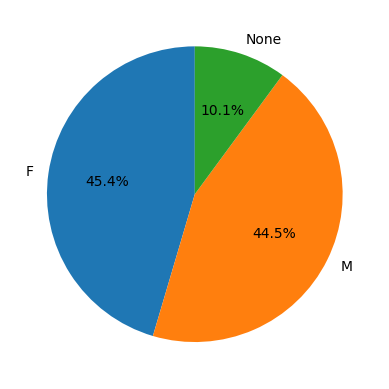

In [11]:
print(df["Gender"].value_counts())
label = ["F","M","None"]
plt.pie(x=df["Gender"].value_counts(),labels=label,startangle=90,autopct="%1.1f%%")

<Axes: xlabel='Gender', ylabel='Transaction Amount'>

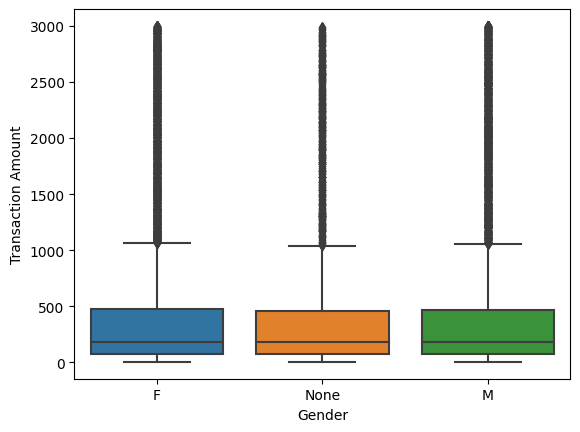

In [12]:
sns.boxplot(x=df["Gender"],y=df["Transaction Amount"])

In [13]:
df.groupby("Gender").agg({"Transaction Amount":["min","max","mean","std"]})

Transaction Amount                                 
                      min      max        mean         std
Gender                                                    
F                    5.12  2999.22  445.521078  637.448612
M                    5.01  2999.88  440.417393  627.381475
None                 5.70  2985.88  434.309277  624.358510

In [14]:
df.groupby("Gender")["Category"].value_counts().unstack()

Category,Clothing,Cosmetic,Electronics,Market,Restaurant,Travel
Gender,,,,,,
F,3663,3824,3794,3738,3833,3861
M,3738,3616,3740,3750,3694,3702
None,860,803,790,894,886,814


<Axes: xlabel='Category', ylabel='Transaction Amount'>

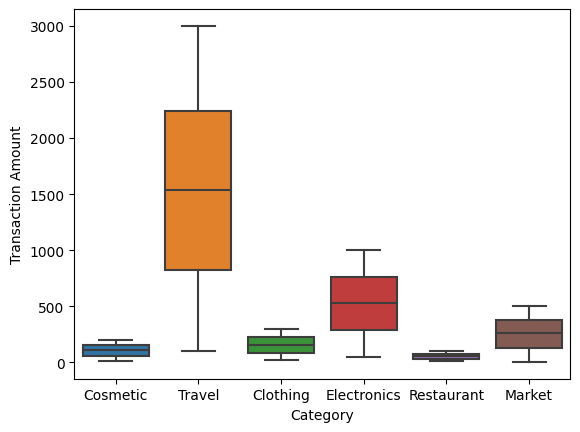

In [15]:
sns.boxplot(x=df["Category"],y=df["Transaction Amount"])

In [16]:
#비용의 범위는 카테고리별로 다르다.
#여행과 전자제품은 가격대가 큰 반면, 레스토랑과 화장품은 가격대가 작다.

In [17]:
df['Birthdate'] = pd.to_datetime(df['Birthdate'], format='%d-%m-%Y')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Age'] = (df['Date'] - df['Birthdate']).dt.days / 365

df.head(3)

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Age
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,20.465753
1,26381,Michelle,Phelps,None,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,37.753425
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,41.931507


<Axes: xlabel='Age', ylabel='Transaction Amount'>

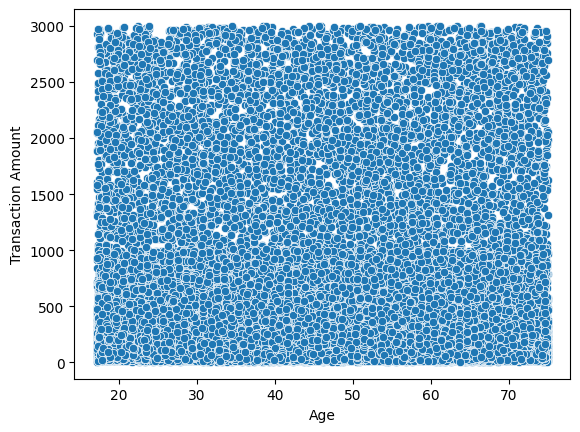

In [18]:
sns.scatterplot(x=df["Age"],y=df["Transaction Amount"])

<Axes: xlabel='Category', ylabel='Age'>

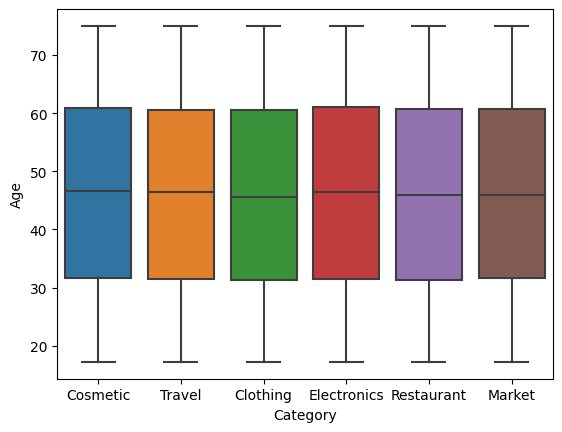

In [19]:
sns.boxplot(x=df["Category"],y=df["Age"])

In [20]:
df.groupby("Category").agg({"Age":["min","max","mean","std"]})

Age                                 
                   min        max       mean        std
Category                                               
Clothing     17.224658  74.989041  45.779360  16.748965
Cosmetic     17.216438  74.989041  46.329698  16.849147
Electronics  17.219178  74.986301  46.183000  16.911491
Market       17.213699  74.997260  46.162849  16.818026
Restaurant   17.221918  74.994521  46.034053  16.878072
Travel       17.213699  74.994521  46.125069  16.795096

In [21]:
#나이가 들수록 거래액과 구매하는 물건이 비슷하다.

In [22]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_name()

In [23]:
df["year"].unique()

array([2023])

In [24]:
df["month"].value_counts()

month
5     5493
7     5458
3     5456
1     5444
8     5399
6     5258
9     5153
4     5091
2     4854
10    2394
Name: count, dtype: int64

<Axes: xlabel='month', ylabel='Transaction Amount'>

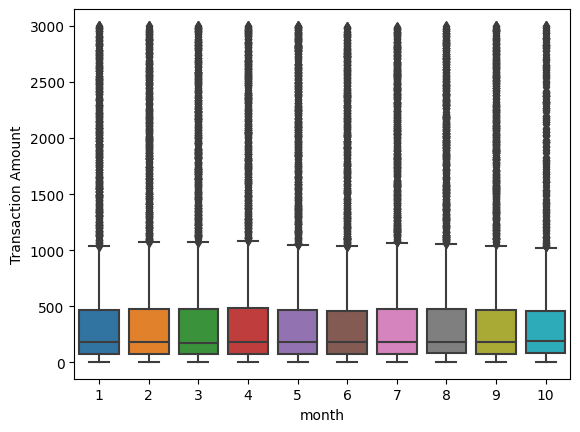

In [25]:
sns.boxplot(x=df["month"],y=df["Transaction Amount"])

<Axes: xlabel='month', ylabel='Transaction Amount'>

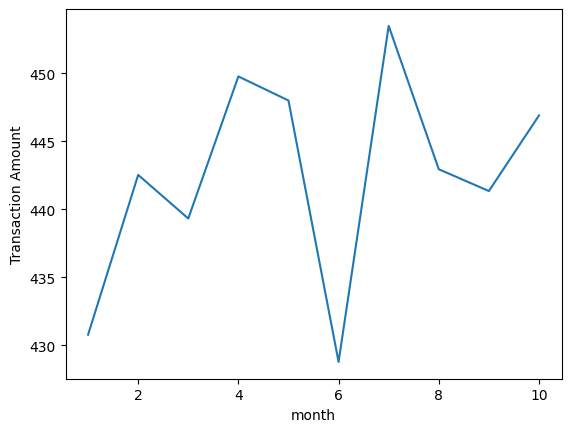

In [26]:
tmp_df = df.groupby("month").agg({"Transaction Amount":"mean"})
sns.lineplot(tmp_df["Transaction Amount"])

In [27]:
df["day"].value_counts()

day
4     1804
8     1794
12    1794
1     1789
6     1769
9     1769
7     1766
3     1757
14    1752
5     1727
11    1720
10    1719
2     1716
13    1685
17    1614
18    1609
27    1590
28    1584
26    1579
23    1574
21    1574
24    1563
15    1562
16    1551
25    1544
19    1531
22    1515
20    1505
30    1369
29    1319
31     856
Name: count, dtype: int64

<Axes: xlabel='day', ylabel='Transaction Amount'>

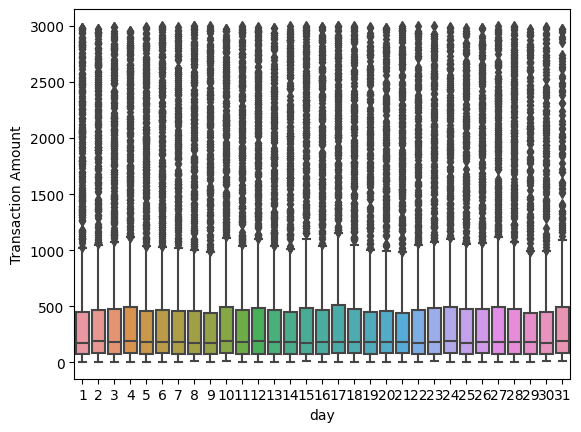

In [28]:
sns.boxplot(x=df["day"],y=df["Transaction Amount"])

<Axes: xlabel='day', ylabel='Transaction Amount'>

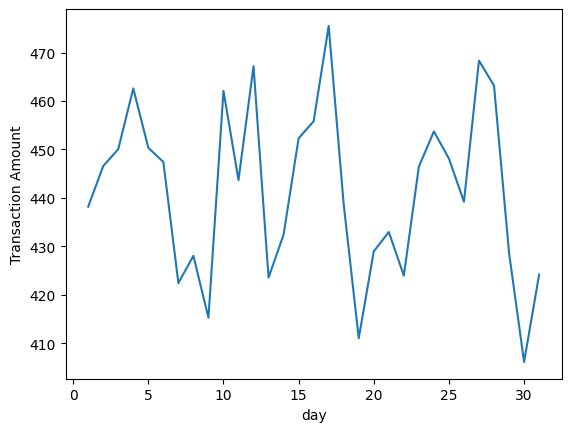

In [29]:
tmp_df = df.groupby("day").agg({"Transaction Amount": "mean"})
sns.lineplot(x=tmp_df.index, y=tmp_df["Transaction Amount"])